# 📚 1. Importação de Bibliotecas e Configuração Inicial

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🖌️ 2. Estilo dos gráficos

In [2]:
# Configurar o estilo dos gráficos para uma melhor visualização
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

print("Bibliotecas importadas com sucesso")

Bibliotecas importadas com sucesso


# 📍 3. Caminhos para os ficheiros

In [3]:
# Definir os caminhos para os ficheiros
caminho_pib = '../data/pib_trimestral.csv'
caminho_cred_empresas = '../data/credito_empresas.csv'
caminho_cred_particulares = '../data/credito_particulares.csv'
caminho_endividamento = '../data/endividamento_setor_devedor.csv'

# Tentar carregar os ficheiros CSV com encoding 'latin1' -> estava a dar erro sem usar isto, provavelmente por causa do "ç" em "preços"
try:
    df_pib = pd.read_csv(caminho_pib, sep=';', encoding='latin1') # separador de campos é ponto e vírgula
    df_cred_empresas = pd.read_csv(caminho_cred_empresas, sep= ';', encoding='latin1')
    df_cred_particulares = pd.read_csv(caminho_cred_particulares, sep= ';', encoding='latin1')
    df_endividamento = pd.read_csv(caminho_endividamento, sep= ';', encoding='latin1')

    print("Ficheiros CSV carregados com sucesso (encoding='latin1').")
    print("PIB:", df_pib.shape) # Exibir o tamanho do DataFrame do PIB (linhas, colunas)
    print("Crédito a Empresas:", df_cred_empresas.shape)
    print("Crédito a Particulares:", df_cred_particulares.shape)
    print("Endividamento:", df_endividamento.shape)

    # Visualizar as primeiras linhas do DataFrame do PIB para inspecionar
    display(df_pib.head())

except Exception as e: # Capturar qualquer erro ao carregar os ficheiros
    print(f"Ocorreu um erro: {e}")
    print("Tenta usar 'windows-1252' se 'latin1' falhar.")

Ficheiros CSV carregados com sucesso (encoding='latin1').
PIB: (89, 7)
Crédito a Empresas: (269, 7)
Crédito a Particulares: (269, 7)
Endividamento: (181, 7)


,# Série,Designação da série (PT),Métrica,Unidade de Medida,Período de referência,Valor,Estado
0,12518314,PIB a preços de mercado-Trim-Dados encadeados ...,Taxa de variação homóloga,Percentagem,2003-03-31,-1.6,NaN
1,12518314,PIB a preços de mercado-Trim-Dados encadeados ...,Taxa de variação homóloga,Percentagem,2003-06-30,-1.9,NaN
2,12518314,PIB a preços de mercado-Trim-Dados encadeados ...,Taxa de variação homóloga,Percentagem,2003-09-30,-0.6,NaN
3,12518314,PIB a preços de mercado-Trim-Dados encadeados ...,Taxa de variação homóloga,Percentagem,2003-12-31,0.4,NaN
4,12518314,PIB a preços de mercado-Trim-Dados encadeados ...,Taxa de variação homóloga,Percentagem,2004-03-31,1.3,NaN


# 🛠️ 4. Processamento dos dataframes

In [4]:
def processar_dataframe(df , col_data='Período de referência', col_valor='Valor'): # o resto das colunas não são necessárias para este estudo
    """
    Função para processar os DataFrames:
    1. Seleciona apenas as colunas de data e valor.
    2. Converte a coluna de data para o formato datetime.
    3. Remove linhas onde o valor é nulo ou não numérico.
    4. Define a data como índice.
    5. Ordena o índice.
    """
    # 1. Selecionar apenas as colunas de interesse
    df_limpo = df[[col_data, col_valor]].copy()
    
    # 2. Renomear colunas para nomes mais simples
    df_limpo.rename(columns={col_data: 'Data', col_valor: 'Valor'}, inplace=True)

    # 3. Converter a coluna de data para datetime
    df_limpo['Data'] = pd.to_datetime(df_limpo['Data'])
    
    # 4. Converter a coluna de valor para numérico, tratando erros
    # O BPstat por vezes usa '...' para dados indisponíveis. to_numeric lida com isso.
    df_limpo['Valor'] = pd.to_numeric(df_limpo['Valor'], errors='coerce') # Converte valores não numéricos para NaN ->
    df_limpo.dropna(subset=['Valor'], inplace=True) # -> E remove linhas onde o valor é NaN

    # 5. Definir a coluna de data como o índice
    df_limpo.set_index('Data', inplace=True)
    
    # 6. Ordenar o índice
    df_limpo.sort_index(inplace=True)
    
    return df_limpo

# Aplicar a função de processamento a cada DataFrame
df_pib_proc = processar_dataframe(df_pib)
df_cred_empresas_proc = processar_dataframe(df_cred_empresas)
df_cred_particulares_proc = processar_dataframe(df_cred_particulares)
df_endividamento_proc = processar_dataframe(df_endividamento)

print("Processamento de todos os DataFrames concluído com sucesso.")
print("\nExemplo do DataFrame do PIB processado:")
display(df_pib_proc.head())
print("\nInformações sobre o DataFrame:")
df_pib_proc.info()

Processamento de todos os DataFrames concluído com sucesso.

Exemplo do DataFrame do PIB processado:


,Valor
Data,
2003-03-31,-1.6
2003-06-30,-1.9
2003-09-30,-0.6
2003-12-31,0.4
2004-03-31,1.3



Informações sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2003-03-31 to 2025-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Valor   89 non-null     float64
dtypes: float64(1)
memory usage: 1.4 KB


# 👁️ 5. Visualização das Séries Temporais Macroeconómicas

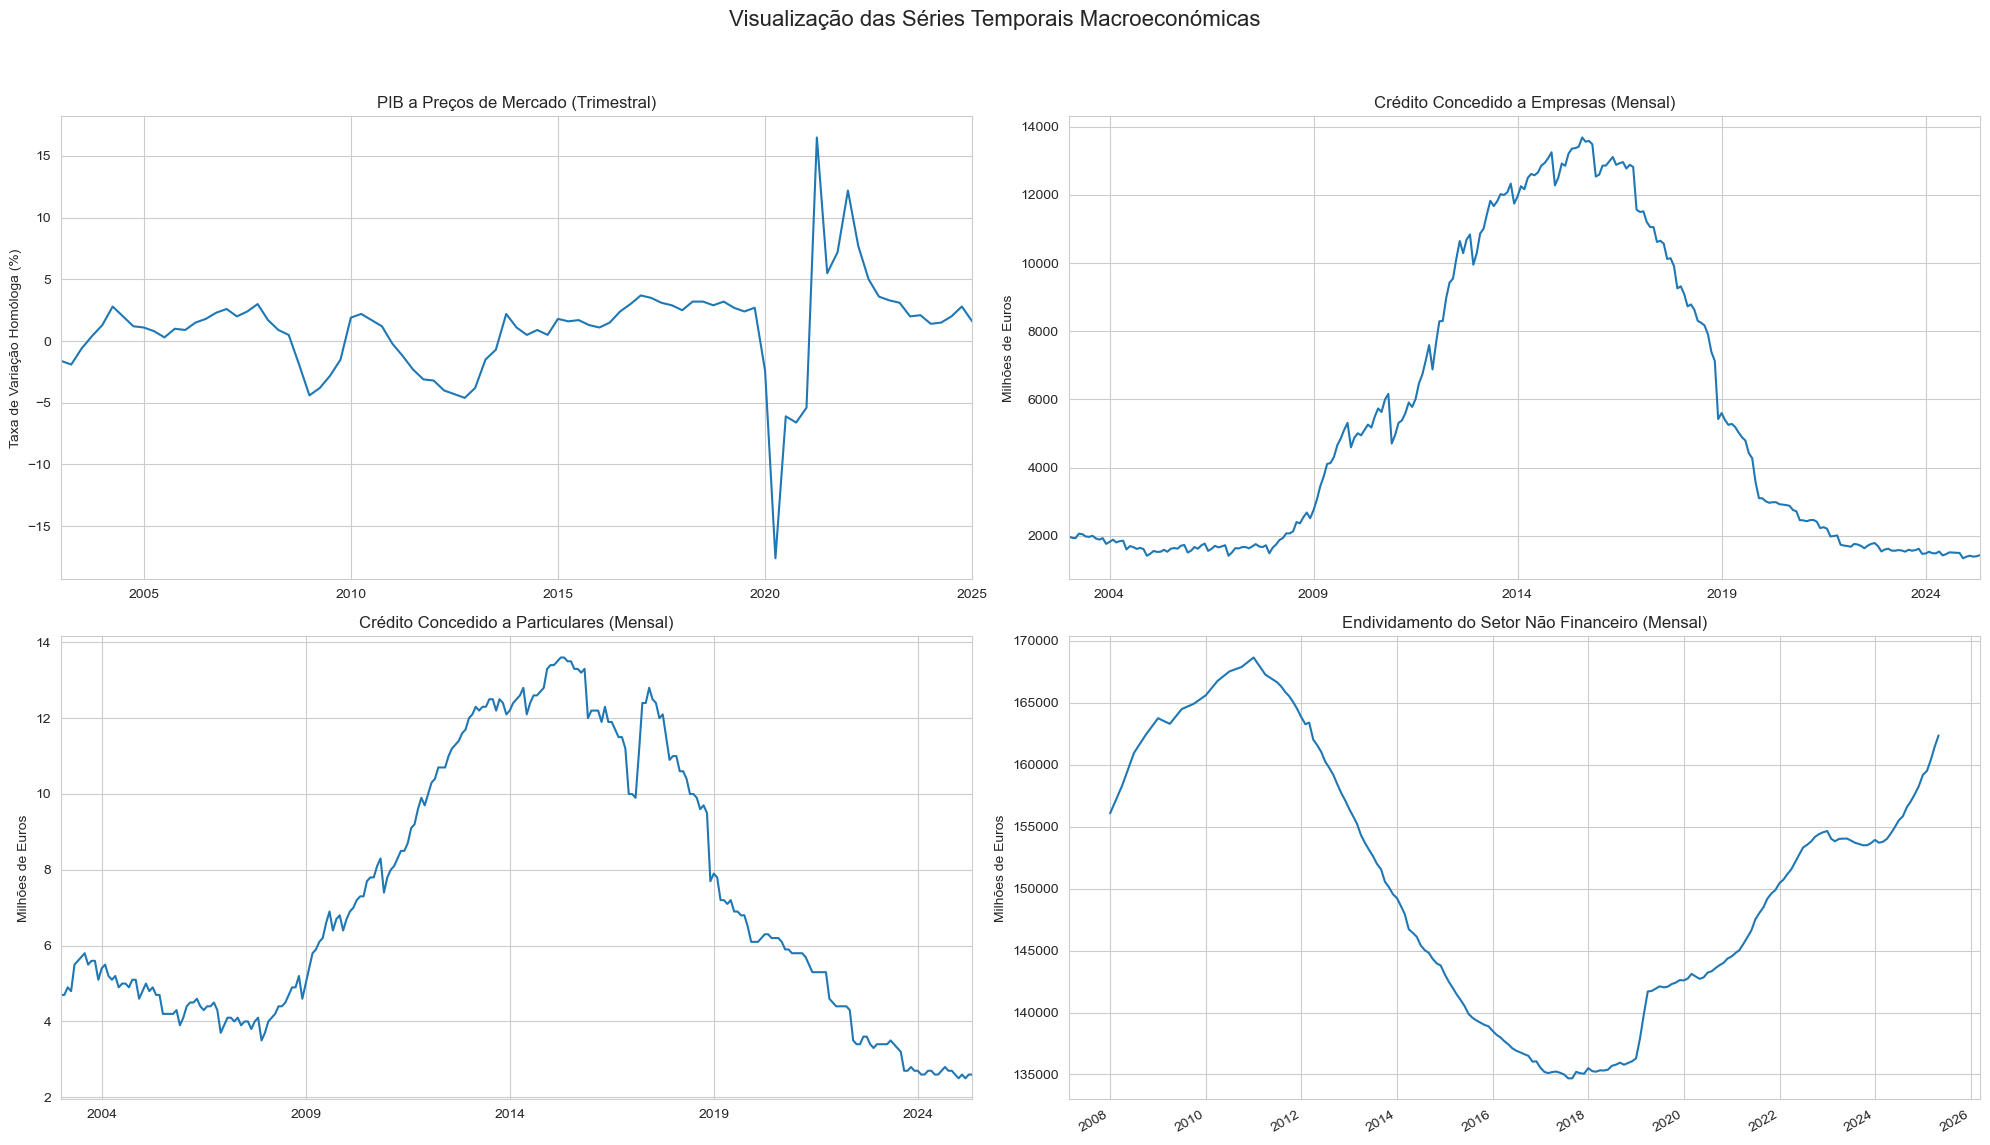

In [5]:
# Figura com 4 subplots (2x2)
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Visualização das Séries Temporais Macroeconómicas', fontsize=16)

# Gráfico 1: PIB Trimestral
# (Nota: O nome da coluna agora é 'Valor')
df_pib_proc['Valor'].plot(ax=axes[0, 0], title='PIB a Preços de Mercado (Trimestral)')
axes[0, 0].set_ylabel('Taxa de Variação Homóloga (%)') # Ajustado com base nos dados
axes[0, 0].set_xlabel('')

# Gráfico 2: Crédito a Empresas
df_cred_empresas_proc['Valor'].plot(ax=axes[0, 1], title='Crédito Concedido a Empresas (Mensal)')
axes[0, 1].set_ylabel('Milhões de Euros')
axes[0, 1].set_xlabel('')

# Gráfico 3: Crédito a Particulares
df_cred_particulares_proc['Valor'].plot(ax=axes[1, 0], title='Crédito Concedido a Particulares (Mensal)')
axes[1, 0].set_ylabel('Milhões de Euros')
axes[1, 0].set_xlabel('')

# Gráfico 4: Endividamento do Setor Não Financeiro
df_endividamento_proc['Valor'].plot(ax=axes[1, 1], title='Endividamento do Setor Não Financeiro (Mensal)')
axes[1, 1].set_ylabel('Milhões de Euros')
axes[1, 1].set_xlabel('')

# Ajustar o layout para evitar sobreposição de títulos
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 🔎 6. Normalização de valores e unificação de dataframes

In [6]:
# 1. Fazer o downsampling das séries mensais para trimestrais ('QE) 
# É mais adequado fazer o downsampling do que o upsampling, pois ao fazer desta maneira estamos a trabalhar com dados reais, e se 
# fossemos fazer o upsampling, estaríamos a criar dados fictícios que não existem na realidade.

# Para o crédito, agregamos somando os valores do trimestre.
# O pandas alinha automaticamente ao final do trimestre (Mar, Jun, Set, Dez).
df_cred_empresas_q = df_cred_empresas_proc.resample('QE').sum()
df_cred_particulares_q = df_cred_particulares_proc.resample('QE').sum()

# Para o endividamento (stock), pegamos no último valor do trimestre.
df_endividamento_q = df_endividamento_proc.resample('QE').last()

print("Resampling de mensal para trimestral concluído.")

# 2. Unificar todas as séries (já trimestrais) num único DataFrame
df_final = pd.concat([
    df_pib_proc,
    df_cred_empresas_q,
    df_cred_particulares_q,
    df_endividamento_q
], axis=1) # axis=1 para juntar como colunas

# 3. Renomear as colunas para serem mais claras
df_final.columns = [
    'PIB_var_homologa',
    'Credito_Empresas_Total',
    'Credito_Particulares_Total',
    'Endividamento_Total'
]

# 4. Remover linhas com valores em falta (NaN)
# Isto acontece se os períodos de tempo não se sobrepuserem perfeitamente. 
# Por exemplo, se o PIB tiver dados trimestrais e o crédito mensal, pode haver NaNs.
# Aqui, removemos qualquer linha que tenha pelo menos um NaN.
df_final.dropna(inplace=True)


print("\nDataFrame final unificado criado com sucesso.")
print("\nPrimeiras linhas do DataFrame final:")
display(df_final.head())

print("\nÚltimas linhas do DataFrame final:")
display(df_final.tail())

print("\nInformações sobre o DataFrame final:")
df_final.info()

Resampling de mensal para trimestral concluído.

DataFrame final unificado criado com sucesso.

Primeiras linhas do DataFrame final:


,PIB_var_homologa,Credito_Empresas_Total,Credito_Particulares_Total,Endividamento_Total
Data,,,,
2007-12-31,3.0,4877.6,11.6,156083.31
2008-03-31,1.7,5278.5,11.8,158296.02
2008-06-30,0.9,6077.3,13.0,160952.95
2008-09-30,0.5,6898.4,14.1,162444.83
2008-12-31,-1.9,7738.9,14.7,163756.38



Últimas linhas do DataFrame final:


,PIB_var_homologa,Credito_Empresas_Total,Credito_Particulares_Total,Endividamento_Total
Data,,,,
2024-03-31,1.4,4503.1,7.9,154016.14
2024-06-30,1.5,4449.8,8.0,155512.53
2024-09-30,2.0,4483.6,8.1,157050.30
2024-12-31,2.8,4341.9,8.0,159183.62
2025-03-31,1.6,4191.2,7.6,161447.65



Informações sobre o DataFrame final:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70 entries, 2007-12-31 to 2025-03-31
Freq: QE-DEC
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PIB_var_homologa            70 non-null     float64
 1   Credito_Empresas_Total      70 non-null     float64
 2   Credito_Particulares_Total  70 non-null     float64
 3   Endividamento_Total         70 non-null     float64
dtypes: float64(4)
memory usage: 2.7 KB


#  7. Matriz de Correlação

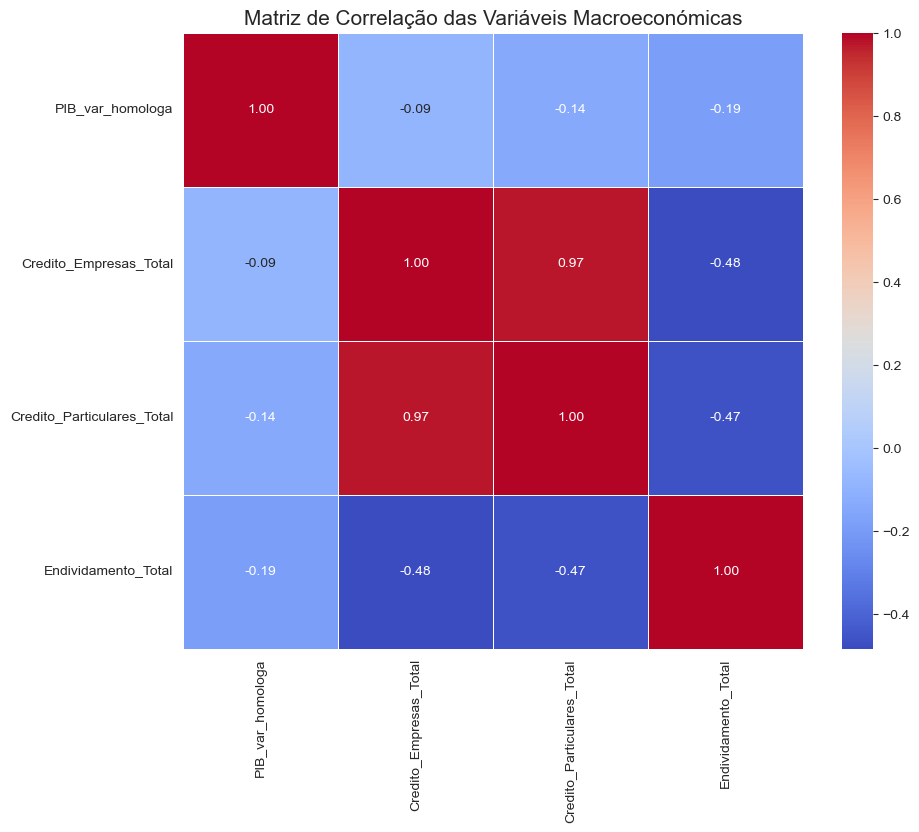


Matriz de Correlação:


,PIB_var_homologa,Credito_Empresas_Total,Credito_Particulares_Total,Endividamento_Total
PIB_var_homologa,1.000000,-0.085225,-0.138561,-0.188631
Credito_Empresas_Total,-0.085225,1.000000,0.974387,-0.484638
Credito_Particulares_Total,-0.138561,0.974387,1.000000,-0.465495
Endividamento_Total,-0.188631,-0.484638,-0.465495,1.000000


In [7]:
# 1. Calcular a matriz de correlação do nosso DataFrame final
correlation_matrix = df_final.corr()

# 2. Visualizar a matriz de correlação com um heatmap para facilitar a interpretação
plt.figure(figsize=(10, 8)) # Ajustar o tamanho da figura
sns.heatmap(
    correlation_matrix,
    annot=True,          # Mostra os valores de correlação em cada célula
    cmap='coolwarm',     # Escolhe um mapa de cores (azul para negativo, vermelho para positivo)
    fmt=".2f",           # Formata os números para terem duas casas decimais
    linewidths=.5        # Adiciona linhas para separar as células
)
plt.title('Matriz de Correlação das Variáveis Macroeconómicas', fontsize=15) 
plt.show()

# Exibir a matriz de correlação como texto também
print("\nMatriz de Correlação:")
display(correlation_matrix)

In [8]:
# --- FIM DO NOTEBOOK 1: EXPORTAÇÃO DOS DADOS PROCESSADOS ---

# Define o caminho onde o ficheiro de dados limpos será guardado.
caminho_saida = '../data/dados_processados_trimestrais.csv'

# Usa a função .to_csv() para guardar o DataFrame.
# O índice (as datas) é guardado por defeito, o que é exatamente o que queremos.
df_final.to_csv(caminho_saida) # Guarda o DataFrame final no caminho especificado 

print("✅ Análise Exploratória e Pré-processamento concluídos.")
print(f"O DataFrame final foi guardado com sucesso no caminho: {caminho_saida}")
print("\n--> Este notebook pode agora ser guardado e fechado.")
print("--> O próximo passo é abrir o '02_modelagem_anomalias.ipynb'.")

✅ Análise Exploratória e Pré-processamento concluídos.
O DataFrame final foi guardado com sucesso no caminho: ../data/dados_processados_trimestrais.csv

--> Este notebook pode agora ser guardado e fechado.
--> O próximo passo é abrir o '02_modelagem_anomalias.ipynb'.
